- artistName is the name of the artist
- trackName is the music name
- energy represents a perceptual measure of intensity and activity, measure from 0.0 to 1.0
- danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity, measure from 0.0 to 1.0
- key The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation 
- loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Measures from -60 to 0.
- mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- speechiness detects the presence of spoken words in a track, measure from 0.0 to 1.0
- acousticness whether the track is acoustic , measure from 0.0 to 1.0
- instrumentalness 	Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- liveness Detects the presence of an audience in the recording.Measure from 0.0 to 1.0
- variance racks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). Measure from 0.0 to 1.0
- tempo In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- duration_ms 	The duration of the track in milliseconds.
- time_signature The time signature (meter) is a notational convention to specify how many beats are in each bar
- The popularity of the artist. The value will be between 0 and 100, with 100 being the most popular. The artist’s popularity is calculated from the popularity of all the artist’s tracks.

# 0.0 Importanto Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## 0.1 Importando Dados

In [2]:
Df_raw = pd.read_csv('My_Spotify_Data_Final.csv')

# 1.0 Descrição dos dados

In [3]:
df1 = Df_raw.copy()
df1.sample(5)

,artistName,trackName,energy,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
11338,MC Kevin o Chris,Medley da Gaiola - Dennis DJ Remix,0.756,0.896,0.896,-5.560,0.0,0.2280,0.71100,0.000000,0.0779,0.686,140.073,240000.0,4.0,61
16188,Zimbra,Viva,0.572,0.494,0.494,-5.395,1.0,0.0339,0.21400,0.000000,0.0646,0.334,132.809,223424.0,4.0,50
11590,Ed Sheeran,Perfect,0.448,0.599,0.599,-6.312,1.0,0.0232,0.16300,0.000000,0.1060,0.168,95.050,263400.0,3.0,86
4941,Lady Gaga,Bad Romance,0.921,0.696,0.696,-3.755,1.0,0.0363,0.00314,0.000052,0.0842,0.714,119.001,294573.0,4.0,80
5093,Zara Larsson,Lush Life,0.712,0.694,0.694,-3.923,0.0,0.0460,0.13300,0.000000,0.2110,0.799,98.022,201122.0,4.0,77


In [4]:
## 1.1 Nome das Colunas

In [5]:
df1.columns

Index(['artistName', 'trackName', 'energy', 'danceability', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'popularity'],
      dtype='object')

In [6]:
## 1.2 Dimensão dos dados

In [7]:
df1.shape

(19423, 16)

In [8]:
## 1.3 Tipos dos Dados

In [9]:
df1.dtypes

artistName           object
trackName            object
energy              float64
danceability        float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature      float64
popularity            int64
dtype: object

In [10]:
## 1.4 Missing Value

In [11]:
df1.isna().sum()

artistName          0
trackName           0
energy              0
danceability        0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
popularity          0
dtype: int64

In [12]:
# 1.5 Descriptive Statistical

In [13]:
 numerical_columns = df1.select_dtypes(include = ['int64','float'])

In [14]:
mean = pd.DataFrame(numerical_columns.apply(np.mean)).T
median = pd.DataFrame(numerical_columns.apply(np.median)).T
std = pd.DataFrame(numerical_columns.apply(np.std)).T

mini = pd.DataFrame(numerical_columns.apply(lambda x:x.min())).T
maxi = pd.DataFrame(numerical_columns.apply(lambda x:x.max())).T
amp = pd.DataFrame(numerical_columns.apply(lambda x:x.max() - x.min())).T

skew = pd.DataFrame(numerical_columns.apply(lambda x:x.skew())).T
kurt = pd.DataFrame(numerical_columns.apply(lambda x:x.kurtosis())).T

In [15]:
Desc = pd.concat([mean,median,std,mini,maxi,amp,skew,kurt]).T.reset_index()

Desc.columns = ['Atribute','mean','median','std','min','max','amplitude','skew','kurtosis']

Desc

,Atribute,mean,median,std,min,max,amplitude,skew,kurtosis
0,energy,0.733476,0.765,0.182096,0.006050,0.999,0.992950,-0.797647,0.229361
1,danceability,0.603575,0.614,0.151928,0.095600,0.974,0.878400,-0.364639,-0.258039
2,key,0.603575,0.614,0.151928,0.095600,0.974,0.878400,-0.364639,-0.258039
3,loudness,-5.752534,-5.379,2.571857,-38.427000,1.509,39.936000,-1.693282,7.432698
4,mode,0.603975,1.000,0.489070,0.000000,1.000,1.000000,-0.425226,-1.819370
5,speechiness,0.081199,0.053,0.074940,0.023100,0.814,0.790900,2.881249,10.656356
6,acousticness,0.216097,0.099,0.250182,0.000003,0.996,0.995997,1.138805,0.198239
7,instrumentalness,0.017861,0.000,0.097344,0.000000,0.972,0.972000,7.135391,54.194542
8,liveness,0.260888,0.150,0.246363,0.019700,0.995,0.975300,1.617006,1.627247
9,valence,0.546933,0.549,0.224298,0.033400,0.988,0.954600,-0.106177,-0.811894


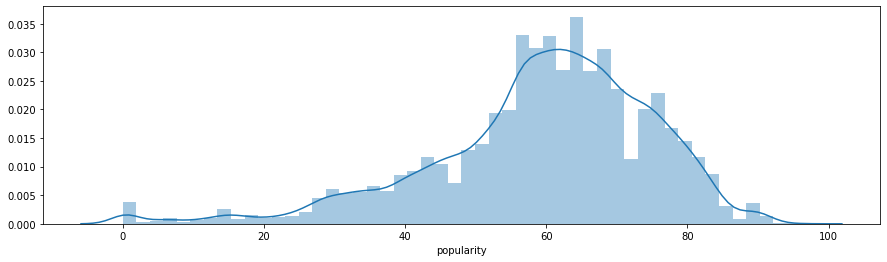

In [16]:
plt.figure(figsize = (15,4))
sns.distplot(df1['popularity'])

## 2.0 Feature Engineering

## 2.1 Lista de Hipoteses

**1. Musicas com maior dancatibilidade são mais populares**

**2. Musicas instrumentais são menos populares**

**3. Musicas acusticas são menos dancaveis**

**4. Musicas ao vivo as pessoas estão mais felizes (variance)**

**5. Musicas dancaveis são mais alegres**

**6 Musicas tristes são mais populares**

In [17]:
## 2.2 Criação de Hipotese

In [17]:
data1 = pd.read_csv('Data1.csv')
data1 = data1.drop('Unnamed: 0',axis = 1)

data2 = pd.read_csv('Data2.csv')
data2 = data2.drop('Unnamed: 0',axis = 1)

data3 = pd.read_csv('Data3.csv')
data3 = data3.drop('index',axis = 1)

data4 = pd.read_csv('Data4.csv')
data5 = pd.read_csv('Data5.csv')
data6 = pd.read_csv('Data6.csv')
data7 = pd.read_csv('Data7.csv')
data8 = pd.read_csv('Data8.csv')
data9 = pd.read_csv('Data9.csv')
data10 = pd.read_csv('Data10.csv')

In [38]:
Data_Final = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9,data10]).reset_index()
Data_Final = Data_Final.drop('index',axis = 1)
Data_Final = Data_Final.drop_duplicates()